In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img  = cv2.imread("data/test1.bmp",0)
show(img)
img1  = cv2.imread("data/test 2.bmp",0)
show(img1)


In [4]:
def hit(image, temp,a,b):
    c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] == image[b-h_t//2+v,a-w_t//2+u]:
                return 255
    return 0

In [5]:
def fit(image, temp,a,b):
#     c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] != image[b-h_t//2+v,a-w_t//2+u]:
                return 0
    return 255

In [6]:
def dilation(img,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = hit(img,t,i,j)
            empty[j,i] = c
    return empty

In [7]:
def erosion(img,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = fit(img,t,i,j)
            empty[j,i] = c
    return empty

In [8]:
def opening(img,temp):
    return dilation(erosion(img,temp),temp)

def closing(img,temp):
    return erosion(dilation(img,temp),temp)

In [9]:
element = np.array(([0,1,0],[1,1,1],[0,1,0]))*255
element = np.array(([1,1,1],[1,1,1],[1,1,1]))*255
element = np.array(([1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]))*255
element = np.array(([1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]))*255
element = np.array(([0,0,0,1,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,0,1,0,0,0]))*255

In [10]:
element = np.array(([0,0,0,1,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [1,1,1,1,1,1,1],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,1,0,0,0]))*255

In [11]:
ele_cir5 = np.array(([0, 1, 1, 1, 0],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [0, 1, 1, 1, 0]))*255

In [12]:
ele_sq5 = np.array(([1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1]))*255


In [13]:
ele_cir7 = np.array(([0, 0, 0, 1, 0, 0, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 0, 0, 1, 0, 0, 0]))*255

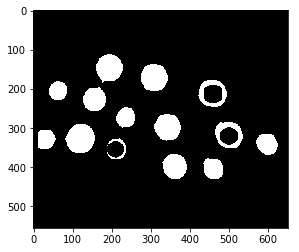

In [14]:
d = img
for i in range(4):
    d = erosion(d,ele_cir7)
plt.imshow(d, cmap='gray')
plt.show()#4

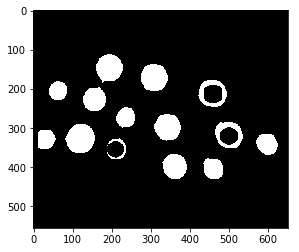

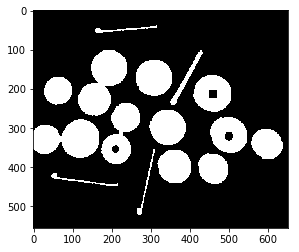

In [15]:
plt.imshow(d, cmap='gray')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()#4

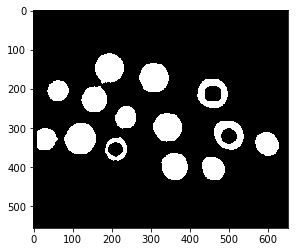

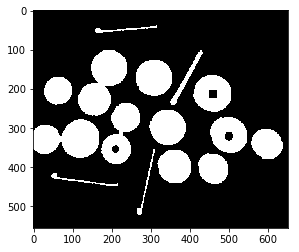

In [16]:
d = dilation(d,ele_cir7)
plt.imshow(d, cmap='gray')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()#1

In [16]:
f = d.copy().astype(np.uint8)

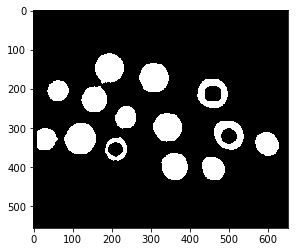

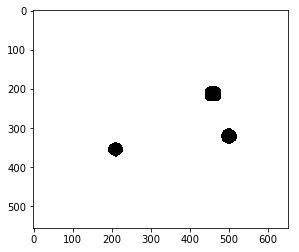

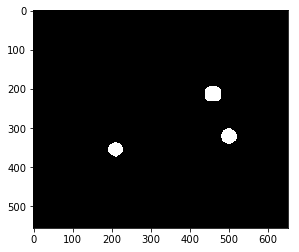

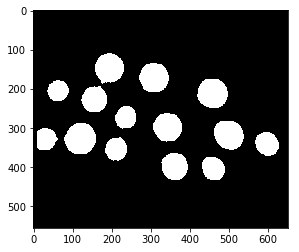

In [44]:
image = f.copy()

h, w = f.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
fill = cv2.floodFill(image, mask, (0,0), 255);
image_inv = cv2.bitwise_not(image)
final_img = f | image_inv


plt.imshow(f,cmap='gray')
plt.show()
plt.imshow(image,cmap='gray')
plt.show()
plt.imshow(image_inv,cmap='gray')
plt.show()
plt.imshow(final_img,cmap='gray')
plt.show()
# cv2.imshow("Thresholded Image", im_th)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imshow("Floodfilled Image", im_floodfill)
# cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
# cv2.imshow("Foreground", im_out)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

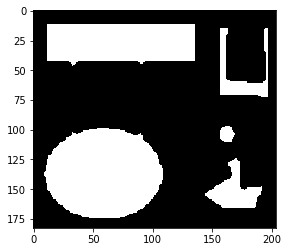

In [17]:
img1_e = img1
img1_e = erosion(img1_e,ele_cir7)
plt.imshow(img1_e,cmap='gray')
plt.show()
# show(dilation(img1_e,ele_cir7))

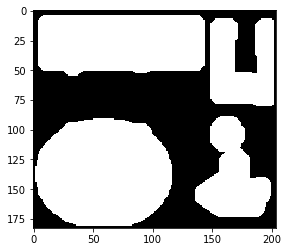

In [18]:
for i in range(4):
    img1_e = dilation(img1_e,ele_cir5)
plt.imshow(img1_e,cmap='gray')
plt.show()

In [77]:
ele_el9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
ele_el9

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [74]:
show(img1)